## FIFA WORLD CUP 2022 DATA Analysis


#### In this analysis we will be analysing three datasets about the FIFA World Cup 2022.The first two datasets contains information about all the matches played and the second one contains information about the idividual players in the world cup. The aim is to identify any interesting facts about the world cup as well as analyse any interesting patterns that might exist in the data

In [77]:
#Import the relevant libraries
import warnings
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")


import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np


In [70]:
#import the datasets
first = pd.read_csv("fifa.csv")
second = pd.read_csv("world_cup_data.csv")



In [ ]:
#### Assessing the Datasets  to identify any issues that might need to be cleaned

In [71]:
first.sample(20)

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,0,1,6,5,0,0,52,72,256,279
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,0,1,8,13,0,0,63,72,139,416
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,0,0,9,15,0,0,63,73,263,251
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,0,1,7,7,0,0,81,72,242,292
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1,0,9,15,0,0,49,54,193,308
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,1,0,12,10,0,0,85,63,321,260
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,0,0,13,14,0,0,72,47,328,218
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,0,0,7,14,0,0,75,72,288,277


In [72]:
second.sample(20)

,match,team1,team2,team1_xg,team2_xg,score,xg_score,date,attendance,venue,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
0,1,Qatar,Ecuador,0.3,1.2,0-2,0.3 - 1.2,20-Nov-22,67372.0,Al Bayt Stadium,...,3.0,4.0,0.0,1.0,19.0,17.0,4.0,2.0,0.0,0.0
1,2,England,IR Iran,2.1,1.4,6-2,2.1 - 1.4,21-Nov-22,45334.0,Khalifa International Stadium,...,2.0,2.0,0.0,1.0,16.0,10.0,0.0,2.0,0.0,0.0
2,3,Senegal,Netherlands,0.9,0.7,0-2,0.9 - 0.7,21-Nov-22,41721.0,Al Thumama Stadium,...,2.0,1.0,0.0,0.0,14.0,14.0,2.0,1.0,0.0,0.0
3,4,United States,Wales,0.8,1.5,1-1,0.8 - 1.5,21-Nov-22,43418.0,Ahmed bin Ali Stadium,...,1.0,1.0,0.0,1.0,11.0,15.0,4.0,2.0,0.0,0.0
4,5,Argentina,Saudi Arabia,2.2,0.1,1-2,2.2 - 0.1,22-Nov-22,88012.0,Lusail Iconic Stadium,...,10.0,1.0,1.0,0.0,22.0,16.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,Morocco,Portugal,1.4,0.9,1-0,1.4 - 0.9,10-Dec-22,44198.0,Al Thumama Stadium,...,2.0,2.0,0.0,0.0,15.0,9.0,4.0,1.0,1.0,0.0
59,60,England,France,2.4,0.9,1-2,2.4 - 0.9,10-Dec-22,68895.0,Al Bayt Stadium,...,1.0,2.0,1.0,0.0,10.0,14.0,1.0,3.0,0.0,0.0
60,61,Argentina,Croatia,NaN,NaN,NaN,NaN,13-Dec-22,NaN,Lusail Iconic Stadium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,France,Morocco,NaN,NaN,NaN,NaN,14-Dec-22,NaN,Al Bayt Stadium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
The first two datasets mostly contain the same information with only a few extra additional columns.So we can merge them and clean at once.
The players_df dataframe is relatively clean,we will not do much wrangling on it

In [5]:
## Wrangling the second dataset

In [6]:
second.describe()

,match,team1_xg,team2_xg,attendance,team1_possession,team2_possession,team1_completed_passes,team1_attempted_pases,team2_completed_passes,team2_attempted_pases,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
count,63.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,32.000000,1.335000,1.275000,51898.150000,51.233333,48.766667,447.083333,548.350000,423.683333,525.200000,...,1.933333,1.966667,0.116667,0.100000,14.133333,14.033333,1.750000,1.700000,0.050000,0.0
std,18.330303,0.868239,0.971566,16192.926981,12.989392,12.989392,159.279872,158.786481,169.516510,173.732485,...,1.755057,1.726824,0.323732,0.302532,4.114739,5.075587,1.590491,1.499152,0.219784,0.0
min,1.000000,0.100000,0.000000,39089.000000,18.000000,19.000000,165.000000,245.000000,162.000000,248.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.0
25%,16.500000,0.700000,0.600000,42051.000000,42.000000,40.000000,332.750000,424.500000,315.000000,412.000000,...,1.000000,1.000000,0.000000,0.000000,11.000000,10.000000,0.750000,1.000000,0.000000,0.0
50%,32.000000,1.150000,1.100000,43983.500000,53.500000,46.500000,453.000000,561.500000,389.000000,487.500000,...,2.000000,2.000000,0.000000,0.000000,14.500000,14.000000,1.500000,1.500000,0.000000,0.0
75%,47.500000,1.700000,1.700000,61051.500000,60.000000,58.000000,532.250000,630.750000,499.500000,601.250000,...,3.000000,3.000000,0.000000,0.000000,16.000000,17.000000,3.000000,2.000000,0.000000,0.0
max,63.000000,4.000000,5.700000,88966.000000,81.000000,82.000000,1009.000000,1093.000000,995.000000,1106.000000,...,10.000000,7.000000,1.000000,1.000000,27.000000,30.000000,7.000000,8.000000,1.000000,0.0


In [7]:
second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match                   63 non-null     int64  
 1   team1                   62 non-null     object 
 2   team2                   62 non-null     object 
 3   team1_xg                60 non-null     float64
 4   team2_xg                60 non-null     float64
 5   score                   60 non-null     object 
 6   xg_score                60 non-null     object 
 7   date                    63 non-null     object 
 8   attendance              60 non-null     float64
 9   venue                   62 non-null     object 
 10  referee                 60 non-null     object 
 11  team1_captain           60 non-null     object 
 12  team2_captain           60 non-null     object 
 13  team1_manager           60 non-null     object 
 14  team2_manager           60 non-null     obje

In [8]:
#Remove any columns that are also available in the first column.This will help us with merging the two
second.drop(columns=['date','referee','attendance','team1_manager','team1_xg','xg_score','team2_xg','team1_captain','team2_captain','team2_manager','score','team1','team2','venue'],inplace=True)
second

,match,team1,team2,score,venue,team1_possession,team2_possession,team1_completed_passes,team1_attempted_pases,team2_completed_passes,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
0,1,Qatar,Ecuador,0-2,Al Bayt Stadium,47.0,53.0,377.0,469.0,430.0,...,3.0,4.0,0.0,1.0,19.0,17.0,4.0,2.0,0.0,0.0
1,2,England,IR Iran,6-2,Khalifa International Stadium,77.0,23.0,740.0,838.0,162.0,...,2.0,2.0,0.0,1.0,16.0,10.0,0.0,2.0,0.0,0.0
2,3,Senegal,Netherlands,0-2,Al Thumama Stadium,46.0,54.0,333.0,427.0,387.0,...,2.0,1.0,0.0,0.0,14.0,14.0,2.0,1.0,0.0,0.0
3,4,United States,Wales,1-1,Ahmed bin Ali Stadium,58.0,42.0,524.0,624.0,335.0,...,1.0,1.0,0.0,1.0,11.0,15.0,4.0,2.0,0.0,0.0
4,5,Argentina,Saudi Arabia,1-2,Lusail Iconic Stadium,69.0,31.0,546.0,659.0,195.0,...,10.0,1.0,1.0,0.0,22.0,16.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,Morocco,Portugal,1-0,Al Thumama Stadium,27.0,73.0,187.0,268.0,606.0,...,2.0,2.0,0.0,0.0,15.0,9.0,4.0,1.0,1.0,0.0
59,60,England,France,1-2,Al Bayt Stadium,57.0,43.0,463.0,543.0,325.0,...,1.0,2.0,1.0,0.0,10.0,14.0,1.0,3.0,0.0,0.0
60,61,Argentina,Croatia,NaN,Lusail Iconic Stadium,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,France,Morocco,NaN,Al Bayt Stadium,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
second.iloc[50]

match                                     51
team1                                 France
team2                                 Poland
score                                    3-1
venue                     Al Thumama Stadium
team1_possession                          55
team2_possession                          45
team1_completed_passes                   501
team1_attempted_pases                    601
team2_completed_passes                   401
team2_attempted_pases                    490
team1_shots_on_target                      8
team2_shots_on_target                      1
team1_total_shots                         16
team2_total_shots                         11
team1_saves                                1
team2_saves                                5
team1_fouls                               10
team2_fouls                                8
team1_corners                              7
team2_corners                              1
team1_crosses                             25
team2_cros

In [10]:
first.iloc[50]

match_no                                              51
day_of_week                                          Sun
date                                           04-Dec-22
hour                                               16:00
venue                                 Al Thumama Stadium
referee                            Jesús Valenzuela Sáez
group                                        Round of 16
1                                                 FRANCE
2                                                 POLAND
attendance                                         40989
1_expected_goals                                     1.4
2_expected_goals                                     1.7
1_poss                                                55
2_poss                                                45
1_goals                                                3
2_goals                                                1
final_score                                          3,1
1_attempts                     

In [13]:
#rename any column names that are not very descriptive
first.rename(columns={'match_no':'match'},inplace=True)
first

,match,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,0,1,6,5,0,0,52,72,256,279
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,0,1,8,13,0,0,63,72,139,416
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,0,0,9,15,0,0,63,73,263,251
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,0,1,7,7,0,0,81,72,242,292
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1,0,9,15,0,0,49,54,193,308
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,1,0,12,10,0,0,85,63,321,260
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,0,0,13,14,0,0,72,47,328,218
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,0,0,7,14,0,0,75,72,288,277


In [14]:
#merge the first and second dataframe.This will place the second dataframe columns on the left of the first
master_df = first.merge(second,how="left",on="match")
master_df

,match,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,3.0,4.0,0.0,1.0,19.0,17.0,4.0,2.0,0.0,0.0
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,2.0,2.0,0.0,1.0,16.0,10.0,0.0,2.0,0.0,0.0
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,2.0,1.0,0.0,0.0,14.0,14.0,2.0,1.0,0.0,0.0
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,1.0,1.0,0.0,1.0,11.0,15.0,4.0,2.0,0.0,0.0
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,10.0,1.0,1.0,0.0,22.0,16.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1.0,2.0,1.0,0.0,10.0,14.0,1.0,3.0,0.0,0.0
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Drop any extra or unwanted columns from the merged dataset
master_df.drop(columns={'team1_possession','team2_possession','1_panelties_scored','2_panelties_scored','1_passes','2_passes','1_passes_compeletd','2_passes_compeletd','1_red_cards','2_red_cards','faul_against_1','faul_against_2','1_yellow_cards','2_yellow_cards','1_ontarget','2_ontarget','final_score','2_corners','1_corners','1_free_kicks','2_free_kicks'},inplace=True)
master_df

,match,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,3.0,4.0,0.0,1.0,19.0,17.0,4.0,2.0,0.0,0.0
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,2.0,2.0,0.0,1.0,16.0,10.0,0.0,2.0,0.0,0.0
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,2.0,1.0,0.0,0.0,14.0,14.0,2.0,1.0,0.0,0.0
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,1.0,1.0,0.0,1.0,11.0,15.0,4.0,2.0,0.0,0.0
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,10.0,1.0,1.0,0.0,22.0,16.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1.0,2.0,1.0,0.0,10.0,14.0,1.0,3.0,0.0,0.0
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Store the data by converting the dataframe to a csv file
master_df.to_csv("fifa_dataset.csv")

## Visualizing performance statistics of teams that participated in the World Cup

Now that our data is clean, we brainstorm the answers we want to find out from the data

**Questions**
Fan Facts
1.Which teams had the most goals ?
2.Which stadiums were most games played at ?
3.Which referees referred most games
4.Which teams had the most passes ?
5. Which teams had the most shots on target?
6. How many yellow cards were given out during the word cup
7. How many red cards were given out during the world cup ?
8. Which teams had the most red cards and yellow cards?
9. Which were the most attended games of the World Cup?
10. Which games had the most penalties ?


Behavioral/Inferential Questions
1.Does the number of passes infleunce the outcome of the game?
2.Does defensive pressure increase the likelihood of winning ?

# FAN FACTS

In [18]:
#take a look at the data again
master_df.sampe(20)

,match,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,3.0,4.0,0.0,1.0,19.0,17.0,4.0,2.0,0.0,0.0
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,2.0,2.0,0.0,1.0,16.0,10.0,0.0,2.0,0.0,0.0
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,2.0,1.0,0.0,0.0,14.0,14.0,2.0,1.0,0.0,0.0
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,1.0,1.0,0.0,1.0,11.0,15.0,4.0,2.0,0.0,0.0
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,10.0,1.0,1.0,0.0,22.0,16.0,0.0,6.0,0.0,0.0
5,6,Tue,22-Nov-22,14:00,Education City Stadium,Cesar Ramos,Group D,DENMARK,TUNISIA,42925,...,1.0,1.0,0.0,0.0,11.0,10.0,2.0,1.0,0.0,0.0
6,7,Tue,22-Nov-22,17:00,Stadium 974,Chris Beath,Group C,MEXICO,POLAND,39369,...,3.0,0.0,0.0,0.0,16.0,16.0,2.0,1.0,0.0,0.0
7,8,Tue,22-Nov-22,20:00,Al Janoub Stadium,Victor Gomes,Group D,FRANCE,AUSTRALIA,40875,...,0.0,0.0,0.0,0.0,11.0,5.0,0.0,3.0,0.0,0.0
8,9,Wed,23-Nov-22,11:00,Al Bayt Stadium,Fernando Rapallini,Group F,MOROCCO,CROATIA,59407,...,0.0,1.0,0.0,0.0,12.0,17.0,1.0,0.0,0.0,0.0
9,10,Wed,23-Nov-22,14:00,Khalifa International Stadium,Ivan Barton,Group E,GERMANY,JAPAN,42608,...,4.0,4.0,1.0,0.0,17.0,10.0,0.0,0.0,0.0,0.0


**Which referees referred most games**

In [23]:
#select the referee column then count the number of gains refereed by each referee then sort these in descending order
master_df['referee'].value_counts().sort_values(ascending=False)

Wilton Sampaio                   4
Cesar Ramos                      4
Facundo Tello                    3
Ismail Elfath                    3
Ivan Barton                      3
Daniele Orsato                   3
Szymon Marciniak                 3
Fernando Rapallini               3
Michael Oliver                   3
Clement Turpin                   3
Antonio Mateu Lahoz              3
Raphael Claus                    2
Mustapha Ghorbal                 2
Slavko Vincic                    2
Mohammed Abdulla Hassan          2
Victor Gomes                     2
Daniel Siebert                   2
Danny Makkelie                   2
Alireza Faghani                  2
Jesús Valenzuela Sáez            2
Abdulrahman Ibrahim Al Jassim    2
Anthony Taylor                   2
Andrés Matonte                   1
Janny Sikazwe                    1
Chris Beath                      1
Stephanie Frappart               1
Mario Escobar                    1
Bakary Papa Gassama              1
Matt Conger         

**Observation**
Cesar Ramos and Wilton Sampaio referred the most games in the FIFA World Cup 2022

Which games did they referee

In [24]:
#Create a new dataset that only includes games played by Cesar and Ramos
ref_games = master_df.loc[( master_df['referee']=='Cesar Ramos') | ( master_df['referee']=='Wilton Sampaio'  )]

#Since we have a lot of columns , select only the ones that will be relevant to our analysis
ref_games = ref_games[['match','venue','referee','1','2']]
ref_games

,match,venue,referee,1,2
2,3,Al Thumama Stadium,Wilton Sampaio,SENEGAL,NETHERLANDS
5,6,Education City Stadium,Cesar Ramos,DENMARK,TUNISIA
21,22,Education City Stadium,Wilton Sampaio,POLAND,SAUDI ARABIA
25,26,Al Thumama Stadium,Cesar Ramos,BELGIUM,MOROCCO
48,49,Khalifa International Stadium,Wilton Sampaio,NETHERLANDS,UNITED STATES
55,56,Lusail Iconic Stadium,Cesar Ramos,PORTUGAL,SWITZERLAND
59,60,Al Bayt Stadium,Wilton Sampaio,ENGLAND,FRANCE
61,62,Al Bayt Stadium,Cesar Ramos,FRANCE,MOROCCO


**Obseravtions**
They refereed early on in the game and later more games towards the end of the tornament

In [25]:
##get a VS column to display the two teams in one column
ref_games['teams'] = ref_games.apply( lambda x : x['1'] + " " + "vs" + " " + x['2'],axis=1)
ref_games.drop(columns={'1','2'}, inplace=True)
ref_games

,match,venue,referee,teams
2,3,Al Thumama Stadium,Wilton Sampaio,SENEGAL vs NETHERLANDS
5,6,Education City Stadium,Cesar Ramos,DENMARK vs TUNISIA
21,22,Education City Stadium,Wilton Sampaio,POLAND vs SAUDI ARABIA
25,26,Al Thumama Stadium,Cesar Ramos,BELGIUM vs MOROCCO
48,49,Khalifa International Stadium,Wilton Sampaio,NETHERLANDS vs UNITED STATES
55,56,Lusail Iconic Stadium,Cesar Ramos,PORTUGAL vs SWITZERLAND
59,60,Al Bayt Stadium,Wilton Sampaio,ENGLAND vs FRANCE
61,62,Al Bayt Stadium,Cesar Ramos,FRANCE vs MOROCCO


In [26]:
#get games by each referee
wilton_games = ref_games.loc[ ref_games['referee']== "Wilton Sampaio"]
cesar_games = ref_games.loc[ ref_games['referee']== "Cesar Ramos"]

wilton_games

,match,venue,referee,teams
2,3,Al Thumama Stadium,Wilton Sampaio,SENEGAL vs NETHERLANDS
21,22,Education City Stadium,Wilton Sampaio,POLAND vs SAUDI ARABIA
48,49,Khalifa International Stadium,Wilton Sampaio,NETHERLANDS vs UNITED STATES
59,60,Al Bayt Stadium,Wilton Sampaio,ENGLAND vs FRANCE


In [27]:
#Print out the games refereed  by each referee
print("The games refereed by Wilton Sampaio are :")
for x in wilton_games['teams'] :
    print(x)

print("The games refereed by Cesar Ramos are :")
for x in cesar_games['teams'] :
    print(x)


The games refereed by Wilton Sampaio are :
SENEGAL vs NETHERLANDS
POLAND vs SAUDI ARABIA
NETHERLANDS vs UNITED STATES
ENGLAND vs FRANCE
The games refereed by Cesar Ramos are :
DENMARK vs TUNISIA
BELGIUM vs MOROCCO
PORTUGAL vs SWITZERLAND
FRANCE vs MOROCCO


**Observation**
**The games refereed by Wilton Sampaio are :**
SENEGAL vs NETHERLANDS
POLAND vs SAUDI ARABIA
NETHERLANDS vs UNITED STATES
ENGLAND vs FRANCE
**The games refereed by Cesar Ramos are :**
DENMARK vs TUNISIA
BELGIUM vs MOROCCO
PORTUGAL vs SWITZERLAND
FRANCE vs MOROCCO

In [28]:
##LOADING THE PLAYERS DATASET
new_df= pd.read_csv("World_Cup_Players.csv")
new_df

,Unnamed: 0,Player,Match_played,Starts,Minutes_played,Gls,Ast,Shots,shots_on_target,goals_per_shot,...,penalty_kick_won,penalty_kick_conceded,own_goal,aerial_duo_won,aerial_duo_lost,Pos,Age,Club_country,Club,Team
0,0,Emiliano Martínez,7,7,690,0,0,0,0,NaN,...,0.0,0.0,0,2.0,0.0,GK,29,eng,Aston Villa,Argentina
1,1,Lionel Messi,7,7,690,7,3,27,13,0.11,...,1.0,0.0,0,2.0,7.0,FW,34,fr,Paris S-G,Argentina
2,2,Nicolás Otamendi,7,7,690,0,1,1,0,0.00,...,0.0,1.0,0,21.0,13.0,DF,34,pt,Benfica,Argentina
3,3,Rodrigo De Paul,7,7,599,0,0,7,3,0.00,...,0.0,0.0,0,2.0,3.0,MF,28,es,Atlético Madrid,Argentina
4,4,Nahuel Molina,7,6,567,1,1,2,1,0.50,...,0.0,0.0,0,0.0,6.0,DF,24,es,Atlético Madrid,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,675,Mohammed Waad,2,0,28,0,0,0,0,NaN,...,0.0,0.0,0,0.0,0.0,"MF,DF",22,qa,Al Sadd SC,Qatar
676,676,Ali Assadalla,1,0,27,0,0,0,0,NaN,...,0.0,0.0,0,0.0,0.0,MF,29,qa,Al Sadd SC,Qatar
677,677,Tarek Salman,1,0,8,0,0,0,0,NaN,...,0.0,0.0,0,0.0,0.0,DF,24,qa,Al Sadd SC,Qatar
678,678,Ahmed Alaaeldin,1,0,6,0,0,0,0,NaN,...,0.0,0.0,0,0.0,0.0,FW,29,qa,Al-Gharafa Sports Club,Qatar


### Which player position has a greater likelihood of being offside


In [30]:
#create a dataframe that only contains two  relevant columns
cols= ["Pos","offside"]
offside = new_df[cols]
offside

,Pos,offside
0,GK,0
1,FW,3
2,DF,1
3,MF,0
4,DF,1
...,...,...
675,"MF,DF",0
676,MF,0
677,DF,0
678,FW,0


In [31]:
#Group palyers by Position and sum the number of players in each position
offside = offside.groupby("Pos").sum()
offside

,offside
Pos,
DF,36
"DF,FW",0
"DF,MF",5
FW,126
"FW,DF",4
"FW,MF",50
GK,0
MF,17
"MF,DF",3


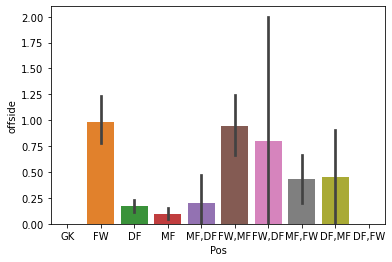

In [32]:
#plot a barplot to visualize the data more easily
sb.barplot(data=new_df,x="Pos",y="offside");


**Observations**
The FW position has a high occurances of being offside
The top three offside positions are FW , ( FW,MF ) and (FW,DF)

Now test if on on average they have high occurances of being offside
**Hypothesis**
H_0 : Strikers on get more than the average number of offsides
H_1 : Strikers get less than the average number of offsides
Confidence = 0.05

In [33]:
#get the average number of offsides
offside_mean = offside.offside.mean()
offside_mean

25.4

In [34]:
#Create a dataframe where the   players are those who are strikers or have the FW position
strikers_only = new_df[(new_df["Pos"]=="FW") | (new_df["Pos"]=="FW,MF") | (new_df["Pos"]=="FW,DF")]
strikers_only

,Unnamed: 0,Player,Match_played,Starts,Minutes_played,Gls,Ast,Shots,shots_on_target,goals_per_shot,...,penalty_kick_won,penalty_kick_conceded,own_goal,aerial_duo_won,aerial_duo_lost,Pos,Age,Club_country,Club,Team
1,1,Lionel Messi,7,7,690,7,3,27,13,0.11,...,1.0,0.0,0,2.0,7.0,FW,34,fr,Paris S-G,Argentina
8,8,Julián Álvarez,7,5,464,4,0,11,8,0.36,...,1.0,0.0,0,2.0,9.0,FW,22,eng,Manchester City,Argentina
10,10,Ángel Di María,5,4,288,1,1,6,3,0.17,...,1.0,0.0,0,0.0,1.0,FW,34,it,Juventus,Argentina
13,13,Lautaro Martínez,6,2,241,0,0,14,4,0.00,...,0.0,0.0,0,6.0,6.0,FW,24,it,Inter,Argentina
20,20,Paulo Dybala,2,0,18,0,0,0,0,NaN,...,0.0,0.0,0,3.0,1.0,FW,28,it,Roma,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,660,Akram Afif,3,3,270,0,0,2,0,0.00,...,0.0,0.0,0,1.0,1.0,FW,25,qa,Al Sadd SC,Qatar
665,665,Almoez Ali,3,3,224,0,0,3,1,0.00,...,0.0,0.0,0,2.0,9.0,FW,25,qa,Al Duhail SC,Qatar
670,670,Ismail Mohamad,2,2,174,0,1,2,2,0.00,...,NaN,NaN,0,NaN,NaN,FW,32,qa,Al Duhail SC,Qatar
674,674,Mohammed Muntari,3,0,63,1,0,3,1,0.33,...,0.0,0.0,0,3.0,1.0,"FW,MF",28,qa,Al Duhail SC,Qatar


In [35]:
#get the offside column
striker_offsides = strikers_only["offside"]
striker_offsides

1      3
8      5
10     5
13     5
20     0
      ..
660    1
665    3
670    1
674    0
678    0
Name: offside, Length: 186, dtype: int64

In [36]:
#conduct a 1 sample t test
from scipy.stats import ttest_1samp

test_statistic, p_value = ttest_1samp(striker_offsides,offside_mean)
if p_value < 0.05:
    print("Reject the null hypothesis - the mean is greater than", offside_mean)
else:
    print("Fail to reject the null hypothesis - the mean is not greater than", offside_mean)

Reject the null hypothesis - the mean is greater than 25.4


**Observation**
From the above we reject the null hypothesis and conclude that the result that fowards have on average a greater chance to be offside is statistically insignificant

### Does the number of passes influence the outcome of the game?

In [37]:
#get the neccessary columns first
passes = master_df[["1_goals","2_goals","team1_completed_passes","team2_completed_passes"]]
passes

,1_goals,2_goals,team1_completed_passes,team2_completed_passes
0,0,2,377.0,430.0
1,6,2,740.0,162.0
2,0,2,333.0,387.0
3,1,1,524.0,335.0
4,1,2,546.0,195.0
...,...,...,...,...
59,1,2,463.0,325.0
60,3,0,NaN,NaN
61,2,0,NaN,NaN
62,2,1,NaN,NaN


In [38]:
#form game_outcome column using a list comprehension.This will present the name of the team if the team won the game ie if it had more games than the other
passes['game_outcome'] = ['Team 1' if x > y else ' Team 2' for x, y in zip(passes['1_goals'], passes['2_goals'])]
passes

,1_goals,2_goals,team1_completed_passes,team2_completed_passes,game_outcome
0,0,2,377.0,430.0,Team 2
1,6,2,740.0,162.0,Team 1
2,0,2,333.0,387.0,Team 2
3,1,1,524.0,335.0,Team 2
4,1,2,546.0,195.0,Team 2
...,...,...,...,...,...
59,1,2,463.0,325.0,Team 2
60,3,0,NaN,NaN,Team 1
61,2,0,NaN,NaN,Team 1
62,2,1,NaN,NaN,Team 1


In [39]:
#get team with most passes, use a list comprehesion again
passes['most_passes'] = ['Team 1' if x > y else ' Team 2' for x, y in zip(passes['team1_completed_passes'], passes['team2_completed_passes'])]
passes

,1_goals,2_goals,team1_completed_passes,team2_completed_passes,game_outcome,most_passes
0,0,2,377.0,430.0,Team 2,Team 2
1,6,2,740.0,162.0,Team 1,Team 1
2,0,2,333.0,387.0,Team 2,Team 2
3,1,1,524.0,335.0,Team 2,Team 1
4,1,2,546.0,195.0,Team 2,Team 1
...,...,...,...,...,...,...
59,1,2,463.0,325.0,Team 2,Team 1
60,3,0,NaN,NaN,Team 1,Team 2
61,2,0,NaN,NaN,Team 1,Team 2
62,2,1,NaN,NaN,Team 1,Team 2


In [40]:
##Now select on the two relevant columns
passes_final= passes[["game_outcome","most_passes"]]
passes_final

,game_outcome,most_passes
0,Team 2,Team 2
1,Team 1,Team 1
2,Team 2,Team 2
3,Team 2,Team 1
4,Team 2,Team 1
...,...,...
59,Team 2,Team 1
60,Team 1,Team 2
61,Team 1,Team 2
62,Team 1,Team 2


In [41]:
#create new column based whether the team with more passes won or lost
passes_final['pass_success'] = [1 if x == y else 0 for x, y in zip(passes_final['game_outcome'], passes_final['most_passes'])]
passes_final

,game_outcome,most_passes,pass_success
0,Team 2,Team 2,1
1,Team 1,Team 1,1
2,Team 2,Team 2,1
3,Team 2,Team 1,0
4,Team 2,Team 1,0
...,...,...,...
59,Team 2,Team 1,0
60,Team 1,Team 2,0
61,Team 1,Team 2,0
62,Team 1,Team 2,0


In [42]:
#count the occurance of each
passes_final['pass_success'].value_counts()

0    34
1    30
Name: pass_success, dtype: int64

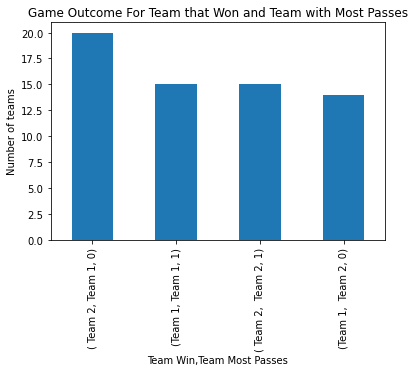

In [69]:
#pot this information on a barchar
passes_final.value_counts().plot(kind="bar");
plt.xlabel("Team Win,Team Most Passes")
plt.ylabel("Number of teams")
plt.title("Game Outcome For Team that Won and Team with Most Passes");

**Observations**
From the above we see that teams with the highest number of passes didnt always win, infact there are more teams which had fewer passes but still won the game

### Which games were the most attended in the World Cup

In [44]:
#form new column which has the two teams playing against each other
master_df["teams"]=  master_df.apply( lambda x : x['1'] + " " + "vs" + " " + x['2'],axis=1)
master_df

,match,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,teams
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,4.0,0.0,1.0,19.0,17.0,4.0,2.0,0.0,0.0,QATAR vs ECUADOR
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,2.0,0.0,1.0,16.0,10.0,0.0,2.0,0.0,0.0,ENGLAND vs IRAN
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,1.0,0.0,0.0,14.0,14.0,2.0,1.0,0.0,0.0,SENEGAL vs NETHERLANDS
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,1.0,0.0,1.0,11.0,15.0,4.0,2.0,0.0,0.0,UNITED STATES vs WALES
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,1.0,1.0,0.0,22.0,16.0,0.0,6.0,0.0,0.0,ARGENTINA vs SAUDI ARABIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,2.0,1.0,0.0,10.0,14.0,1.0,3.0,0.0,0.0,ENGLAND vs FRANCE
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARGENTINA vs CROATIA
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRANCE vs MOROCCO
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CROATIA vs MOROCCO


In [45]:
#create a new dataframe with only relevant columns
most_attended = master_df[["teams","venue","attendance"]]
most_attended

,teams,venue,attendance
0,QATAR vs ECUADOR,Al Bayt Stadium,67372
1,ENGLAND vs IRAN,Khalifa International Stadium,45334
2,SENEGAL vs NETHERLANDS,Al Thumama Stadium,41721
3,UNITED STATES vs WALES,Ahmed bin Ali Stadium,43418
4,ARGENTINA vs SAUDI ARABIA,Lusail Iconic Stadium,88012
...,...,...,...
59,ENGLAND vs FRANCE,Al Bayt Stadium,68895
60,ARGENTINA vs CROATIA,Lusail Iconic Stadium,88966
61,FRANCE vs MOROCCO,Al Bayt Stadium,68294
62,CROATIA vs MOROCCO,Khalifa International Stadium,44137


In [46]:
#sort the values in ascending order
most_attended = most_attended.sort_values('attendance',ascending=False)
most_attended

,teams,venue,attendance
63,ARGENTINA vs FRANCE,Lusail Iconic Stadium,88966
60,ARGENTINA vs CROATIA,Lusail Iconic Stadium,88966
23,ARGENTINA vs MEXICO,Lusail Iconic Stadium,88966
31,PORTUGAL vs URUGUAY,Lusail Iconic Stadium,88668
57,NETHERLANDS vs ARGENTINA,Lusail Iconic Stadium,88235
...,...,...,...
11,BELGIUM vs CANADA,Ahmed bin Ali Stadium,40432
10,SPAIN vs COSTA RICA,Al Thumama Stadium,40013
28,CAMEROON vs SERBIA,Al Janoub Stadium,39789
6,MEXICO vs POLAND,Stadium 974,39369


In [47]:
#DATA obtained from statista : https://www.statista.com/statistics/1298103/fifa-world-cup-qatar-stadium-capacities/

#create new dataframe from stadium maximum capacities
stadium_capacities = pd.DataFrame(
    {
        "Stadium" : ["Lusail Stadium", "Al Bayt Stadium","Education City Stadium","Khalifa Int Stadium","Stadium 974","Al Janoub  Stadium","Ahmad Bin Ali Stadium","Al Thumama Stadium"],
        "Capacity" : [80000,60000,40000,40000,40000,40000,40000,40000,]
    }
)
stadium_capacities

,Stadium,Capacity
0,Lusail Stadium,80000
1,Al Bayt Stadium,60000
2,Education City Stadium,40000
3,Khalifa Int Stadium,40000
4,Stadium 974,40000
5,Al Janoub Stadium,40000
6,Ahmad Bin Ali Stadium,40000
7,Al Thumama Stadium,40000


In [48]:
#create function to calculate percentage capacity
#we are doing this because each stadium had differnt holding capacities so to get an accurate representation we get percentage of filling based on the stadium's holding capacity
def percentages(stadium,attendance) :
    if(stadium =="Lusail Iconic Stadium"):
        return round(attendance/80000 * 100,2)
    elif ( stadium=="Al Bayt Stadium"):
        return  round(attendance/60000 *100,2)
    else :
        return round(attendance/40000 * 100,2)

In [49]:
#apply the function to new column
most_attended["percentage_capacity"] = most_attended.apply( lambda x : percentages(x["venue"],x["attendance"]), axis =1)
most_attended

,teams,venue,attendance,percentage_capacity
63,ARGENTINA vs FRANCE,Lusail Iconic Stadium,88966,111.21
60,ARGENTINA vs CROATIA,Lusail Iconic Stadium,88966,111.21
23,ARGENTINA vs MEXICO,Lusail Iconic Stadium,88966,111.21
31,PORTUGAL vs URUGUAY,Lusail Iconic Stadium,88668,110.83
57,NETHERLANDS vs ARGENTINA,Lusail Iconic Stadium,88235,110.29
...,...,...,...,...
11,BELGIUM vs CANADA,Ahmed bin Ali Stadium,40432,101.08
10,SPAIN vs COSTA RICA,Al Thumama Stadium,40013,100.03
28,CAMEROON vs SERBIA,Al Janoub Stadium,39789,99.47
6,MEXICO vs POLAND,Stadium 974,39369,98.42


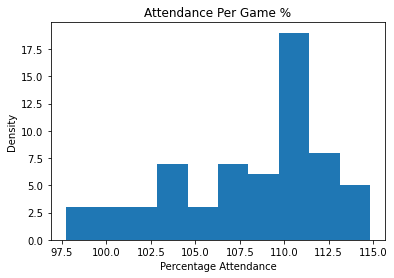

In [66]:
#plot the attndances on a histogram
plt.hist(x=most_attended["percentage_capacity"])
plt.xlabel("Percentage Attendance")
plt.ylabel("Density")
plt.title("Attendance Per Game %");

In [50]:
#get matches which exceeded full capacity
most_attended_exceeded = most_attended.loc[most_attended["percentage_capacity"]>100]
most_attended_exceeded

,teams,venue,attendance,percentage_capacity
63,ARGENTINA vs FRANCE,Lusail Iconic Stadium,88966,111.21
60,ARGENTINA vs CROATIA,Lusail Iconic Stadium,88966,111.21
23,ARGENTINA vs MEXICO,Lusail Iconic Stadium,88966,111.21
31,PORTUGAL vs URUGUAY,Lusail Iconic Stadium,88668,110.83
57,NETHERLANDS vs ARGENTINA,Lusail Iconic Stadium,88235,110.29
15,BRAZIL vs SERBIA,Lusail Iconic Stadium,88103,110.13
4,ARGENTINA vs SAUDI ARABIA,Lusail Iconic Stadium,88012,110.02
47,CAMEROON vs BRAZIL,Lusail Iconic Stadium,85986,107.48
38,POLAND vs ARGENTINA,Lusail Iconic Stadium,84985,106.23
55,PORTUGAL vs SWITZERLAND,Lusail Iconic Stadium,83720,104.65


**Observation**
We see that attendance depended on the stadium's capacity.Stadiums with higher capacities had more people .
It is also observed that most games(about 60 out of 64 games) exceeed full capacity ie above 100% capacity
Showing that there was signifcant show up to the world cup games
Lusail Stadium had the highest attendences and was always filled above maximum capacity

### How many yellow cards and red cards were given out during the world cup

In [51]:
#get total number of yellow cards and red cards given
yellow_cards = new_df["CrdY"].sum()
red_cards = new_df["CrdR"].sum()
print(f"Red cards given : {red_cards}\n Yellow cards given : {yellow_cards}")

Red cards given : 4
 Yellow cards given : 226


#### Which teams had the most red and yellow cards

In [52]:
#select columns where the team had a red/yellow card ie red card or yellow card was 1
teams_y = new_df.loc[new_df["CrdY"]==1]
teams_r = new_df.loc[new_df["CrdR"]==1]
teams_r["Team"]

89         Morocco
97     Netherlands
403       Cameroon
632          Wales
Name: Team, dtype: object

**Observation**
No team had more than 1 red card.There were only four teams which got red cards namely Morrocco, Netherlands, Cameroon and Wales
However 32 teams got yellow cards with Saudi Arabia and Netherlands having the most yellow cards(10).

In [53]:
#count the number of yellow cards per team
teams_y.Team.value_counts()

Netherlands       10
Saudi Arabia      10
Uruguay            8
Canada             8
France             8
Switzerland        7
Mexico             7
Morocco            7
Qatar              7
Croatia            6
Portugal           6
Brazil             6
Argentina          5
Tunisia            5
Senegal            5
United States      5
IR Iran            5
Wales              5
Denmark            5
Poland             5
Korea Republic     4
Cameroon           4
Japan              4
Ghana              4
Costa Rica         4
Australia          3
Germany            3
Belgium            3
Serbia             3
Spain              2
England            1
Ecuador            1
Name: Team, dtype: int64

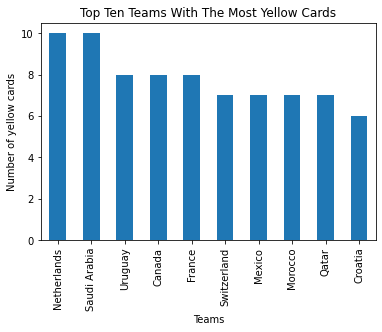

In [61]:
#plot these on a bar chart for easier visuaization
teams_y.Team.value_counts().head(10).plot(kind="bar")
plt.xlabel("Teams")
plt.ylabel("Number of yellow cards")
plt.title("Top Ten Teams With The Most Yellow Cards");

#### Which team had the most goals

In [55]:
#create a dataframe with the relavat columns only
t_goals = new_df[["Team","Gls"]]
t_goals

,Team,Gls
0,Argentina,0
1,Argentina,7
2,Argentina,0
3,Argentina,0
4,Argentina,1
...,...,...
675,Qatar,0
676,Qatar,0
677,Qatar,0
678,Qatar,0


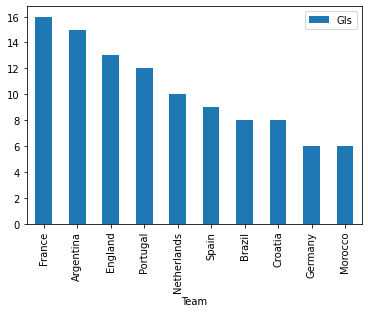

In [56]:
#Sinnce we are using the players dataframe, we have to group the player goals by team the sum the goals per team
t_goals = t_goals.groupby('Team').sum()
#sort the values in descendinng orders and present on a ar chart
t_goals.sort_values('Gls',ascending=False).head(10).plot(kind="bar");

**Observations**
The team with the most goals was France with 16 goals, followed by Argentina(15) and England(14)

In [74]:
#### Top 10 countries with the youngest number of players

In [92]:
#visualise the age on a histogram using plotly
figure = px.histogram(new_df,
                      x = "Age")
figure.show();

In [89]:
#Since most players reach thier peak at 30 years.We will set the young player peg at 25 years old
y_players = new_df[["Age","Team"]]
y_players = y_players.loc[y_players["Age"]<26 ]
y_players

,Age,Team
4,24,Argentina
5,23,Argentina
6,24,Argentina
7,21,Argentina
8,22,Argentina
...,...,...
669,24,Qatar
671,25,Qatar
672,24,Qatar
675,22,Qatar


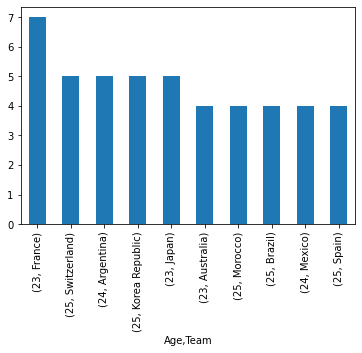

In [91]:
y= y_players.value_counts().head(10).plot(kind="bar");

In [95]:
y= y_players.value_counts().head(10)
y

Age  Team          
23   France            7
25   Switzerland       5
24   Argentina         5
25   Korea Republic    5
23   Japan             5
     Australia         4
25   Morocco           4
     Brazil            4
24   Mexico            4
25   Spain             4
dtype: int64

**Observation**
France has the highest number of young players(7), followed by Switzerland,Argentina ,Japan and South Korea which all have 5 young players


#### Do older players score more goals than the younger ones

In [79]:
#since strikers are the players who have a greater likelihood of scoring, we will only analyse this relation among strikers so we use the striker_only dataframe we created earlier
figure = px.scatter(strikers_only,
                    x = "Age",
                    y = "Gls",
                    trendline = "ols")
figure.show();

In [80]:
corr = np.corrcoef(strikers_only['Age'],strikers_only['Gls'])[0,1]
print(f"The correlation coeffecient is : {corr:.3f}")

The correlation coeffecient is : 0.097


**Observation**
There is a weak positive correlation etween age and the numbber of goals scored by a striker
Thus could be explained by the phenomenon or risng stars and retiring GOATS, therefore exists in only a few players

### Finding the top 10 clubs with the most number of players

In [83]:
#select the club column and count the number of players in ecah club then return only the top 10 clubs with the highest number of players
clubs = new_df["Club"]
clubs.value_counts().head(10)
club_Players = clubs.value_counts().head(10)
club_Players

Manchester City    16
Bayern Munich      16
Barcelona          14
Al Sadd SC         13
Manchester Utd     13
Real Madrid        12
Paris S-G          11
Tottenham          11
Atlético Madrid    11
Al-Hilal           11
Name: Club, dtype: int64

In [84]:
#plot the clubs on a bar chart
figure = px.bar(club_Players,
                x = "Club",
                title = "Top 10 clubs with the highest number of players",
                color = "Club")
figure.show();

**Observations**
Manchester city and Bayern Munich had the most players in the world cup